In [ ]:
# version necesaria de numpy 2.2.4 para modelo bayesiano, instalar y reiniciar kermel
pip install numpy==2.2.4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [2]:
# Cargar los datos desde el archivo CSV
file_path = "../data/raw/Tablas_Unidas.csv"
df = pd.read_csv(file_path, sep=',')

# Convertir la columna ID_Date a formato de fecha (YYYY-MM-DD)
df['ID_Date'] = pd.to_datetime(df['ID_Date'], format='%Y%m').dt.strftime('%Y-%m-%d')

# Columnas a limpiar (ejemplo)
columnas_numericas = ['CINE', 'EXTERIOR', 'INTERNET', 'PRENSA', 'RADIO', 'REVISTAS', 
                      'PlataformasVideo', 'VARIOS', 'Sales', 'Ticket_medio', 'INV_Total', "PRODUCCION"]

for col in columnas_numericas:
    if df[col].dtype == object:  # Si es texto (por las comas)
        df[col] = df[col].str.replace(',', '.').astype(float)  # Convertir a float


# Mostrar el DataFrame
df.head(5)

,ID_Date,Unique_visitors,PDFBrochuresDownloaded,ProductConfigurator,Product_configurator_Visists,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,...,CINE,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,REVISTAS,PlataformasVideo,VARIOS,INV_Total
0,2022-01-01,272382,4838,33222,94248,1415,65373,25,167199,63649,...,59887.84,8200.00,133666.43,0.0,6050.0,2426.40,18013.50,338824.94,7531.03,574600.14
1,2022-02-01,352581,5823,38570,109531,546,77209,26,176733,124861,...,72291.56,94627.51,189275.94,10000.0,6700.0,0.00,49110.91,487537.14,6972.02,916515.08
2,2022-03-01,332955,4845,33956,97805,5444,83178,341,173514,104132,...,55000.00,0.00,214037.62,4500.0,3700.0,0.00,0.00,75000.00,15284.85,367522.47
3,2022-04-01,282169,3711,45949,90689,1184,69335,162,162805,74044,...,10883.30,0.00,194816.97,48800.0,21550.0,1140.00,40876.00,610865.89,12255.75,941187.91
4,2022-05-01,261829,9037,48685,92069,8648,70972,210,156011,44196,...,74333.20,0.00,130795.16,11000.0,4900.0,102851.86,20775.75,393807.74,7926.46,746390.17


In [ ]:
# Lista de columnas relevantes
# Estas son las columnas que nos vamos a quedar:
# - La columna de fecha (ID_Date)
# - Las columnas de cómo accede la gente a la página web (SocialNetworks, DirectTraffic, EMail, NaturalSearch, OnlineMedia, OtherReferrer, PaidSearch)
# - Las columnas de inversión (CINE, EXTERIOR, INTERNET, PRENSA, PRODUCCION, RADIO, REVISTAS, PlataformasVideo, VARIOS, INV_Total)
# - Las columnas relacionadas con fechas (Dias_mes, Dia_inicio_mes, Dia_findemes, working_days, Dias_fines_semana, Easterweek)
cols_to_keep = [
    "ID_Date", "Unique_visitors", "Visit_Store", "Sales", "SocialNetworks", "DirectTraffic", "EMail",
    "NaturalSearch", "OnlineMedia", "OtherReferrer", "PaidSearch", "CINE", "EXTERIOR", "INTERNET", "PRENSA", "PRODUCCION", "RADIO",
    "REVISTAS", "PlataformasVideo", "VARIOS", "INV_Total", "Dias_mes", "Dia_inicio_mes", "Dia_findemes", "working_days",
    "Dias_fines_semana", "Easterweek"
]

# Filtrado total
filtered_df = df[cols_to_keep]

# Mostrar todas las columnas completas (sin "...")
pd.set_option('display.max_columns', None)


filtered_df.head()

,ID_Date,Unique_visitors,Visit_Store,Sales,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,OtherReferrer,PaidSearch,CINE,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,REVISTAS,PlataformasVideo,VARIOS,INV_Total,Dias_mes,Dia_inicio_mes,Dia_findemes,working_days,Dias_fines_semana,Easterweek
0,2022-01-01,272382,5516,1299,1415,65373,25,167199,63649,39808,13798,59887.84,8200.00,133666.43,0.0,6050.0,2426.40,18013.50,338824.94,7531.03,574600.14,31,5,7,21,10,0
1,2022-02-01,352581,6769,1752,546,77209,26,176733,124861,45543,28656,72291.56,94627.51,189275.94,10000.0,6700.0,0.00,49110.91,487537.14,6972.02,916515.08,28,1,7,20,8,0
2,2022-03-01,332955,6249,1897,5444,83178,341,173514,104132,43583,15243,55000.00,0.00,214037.62,4500.0,3700.0,0.00,0.00,75000.00,15284.85,367522.47,31,1,3,23,8,0
3,2022-04-01,282169,6507,1546,1184,69335,162,162805,74044,39650,18510,10883.30,0.00,194816.97,48800.0,21550.0,1140.00,40876.00,610865.89,12255.75,941187.91,30,4,5,22,8,1
4,2022-05-01,261829,7183,1784,8648,70972,210,156011,44196,40472,20031,74333.20,0.00,130795.16,11000.0,4900.0,102851.86,20775.75,393807.74,7926.46,746390.17,31,6,1,21,10,0


C:\Users\josit\AppData\Local\Temp\ipykernel_2796\2186284899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['INV_Total'] = filtered_df['INV_Total'].round().astype(int)  # Redondear a enteros


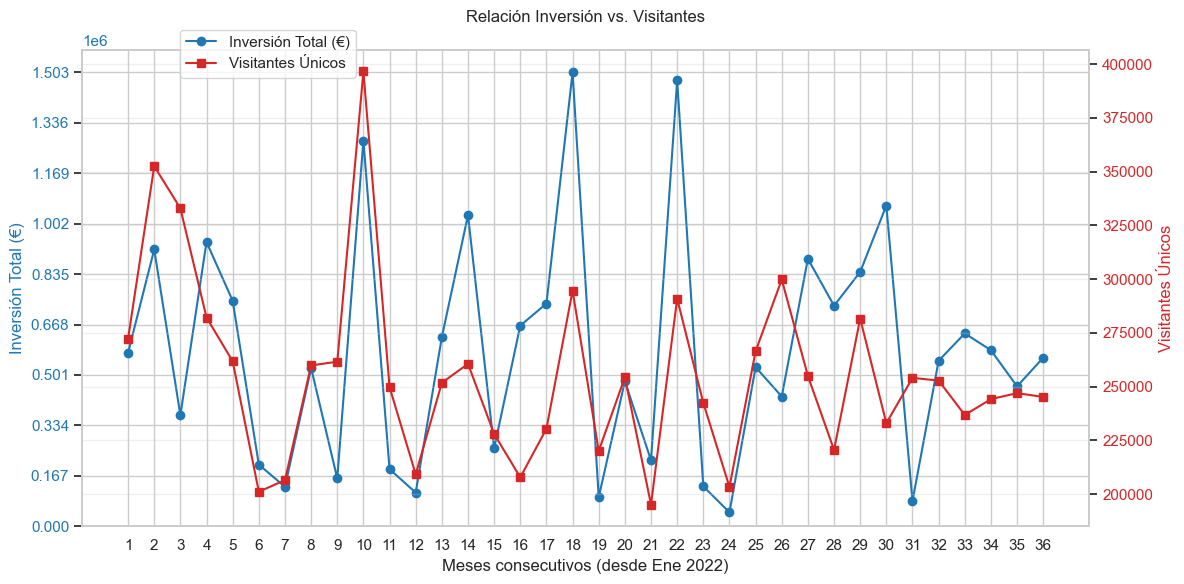

In [105]:
# Preparación de datos
filtered_df['INV_Total'] = filtered_df['INV_Total'].round().astype(int)  # Redondear a enteros
meses = range(1, len(filtered_df) + 1)  # Índice numérico 1, 2, 3...

# Configuración del gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Eje Izquierdo (Inversión Total) ---
ax1.plot(meses, filtered_df['INV_Total'], 
         color='tab:blue', marker='o', label='Inversión Total (€)')

# Configuración del eje Y izquierdo
max_inversion = filtered_df['INV_Total'].max()
ax1.set_ylim(0, max_inversion * 1.05)  # 5% más arriba del máximo
ax1.set_yticks(np.linspace(0, max_inversion, 10))  # 10 divisiones equidistantes
ax1.set_ylabel('Inversión Total (€)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# --- Eje Derecho (Visitantes Únicos) ---
ax2 = ax1.twinx()
ax2.plot(meses, filtered_df['Unique_visitors'], 
         color='tab:red', marker='s', label='Visitantes Únicos')
ax2.set_ylabel('Visitantes Únicos', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# --- Ajustes finales ---
ax1.set_xticks(meses)
ax1.set_xticklabels([f'{i}' for i in meses])
ax1.set_xlabel('Meses consecutivos (desde Ene 2022)')

plt.title('Relación Inversión vs. Visitantes', pad=20)
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.95))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

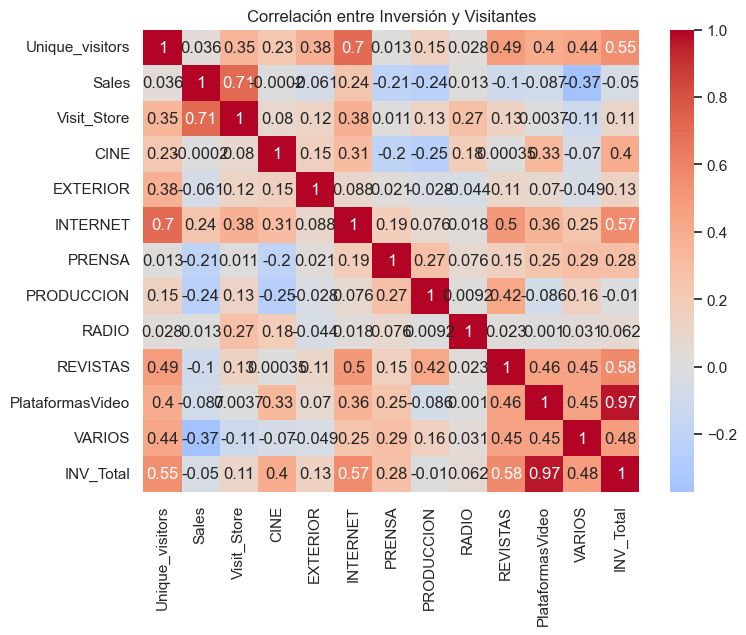

In [106]:
# Calcular matriz de correlación
corr = filtered_df[['Unique_visitors',"Sales", 'Visit_Store', "CINE","EXTERIOR","INTERNET","PRENSA","PRODUCCION","RADIO","REVISTAS","PlataformasVideo","VARIOS","INV_Total"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Inversión y Visitantes')
plt.show()

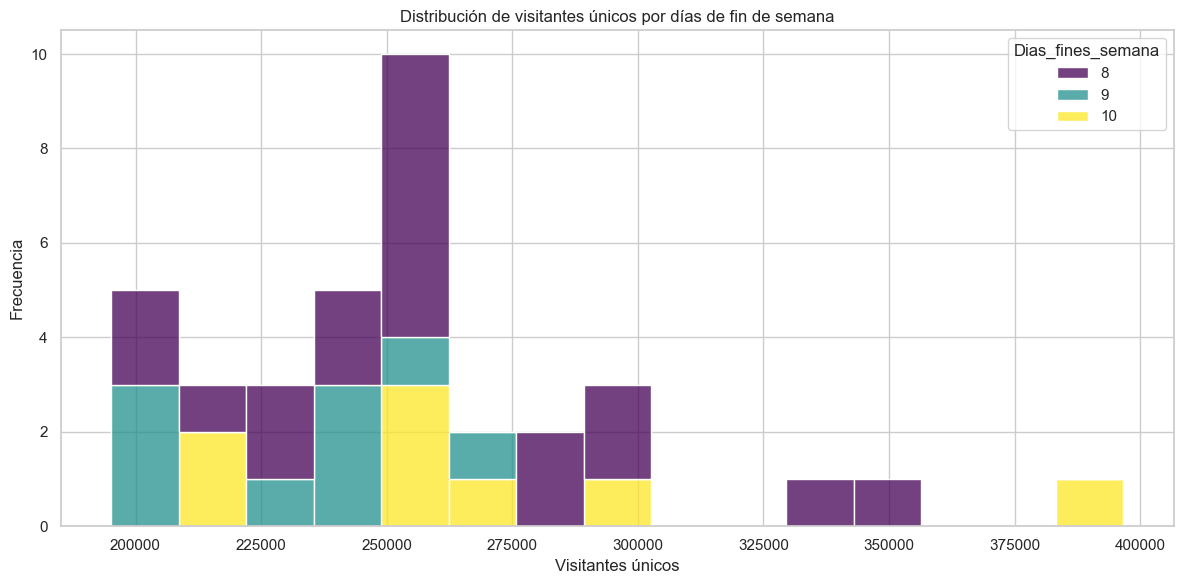

In [107]:
# Estilo
sns.set(style="whitegrid")

# Histograma agrupado por cantidad de días de fin de semana
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Unique_visitors', hue='Dias_fines_semana', bins=15, palette='viridis', multiple='stack')
plt.title('Distribución de visitantes únicos por días de fin de semana')
plt.xlabel('Visitantes únicos')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


C:\Users\josit\AppData\Local\Temp\ipykernel_2796\3927406491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='working_days', y='Unique_visitors', palette='Blues')


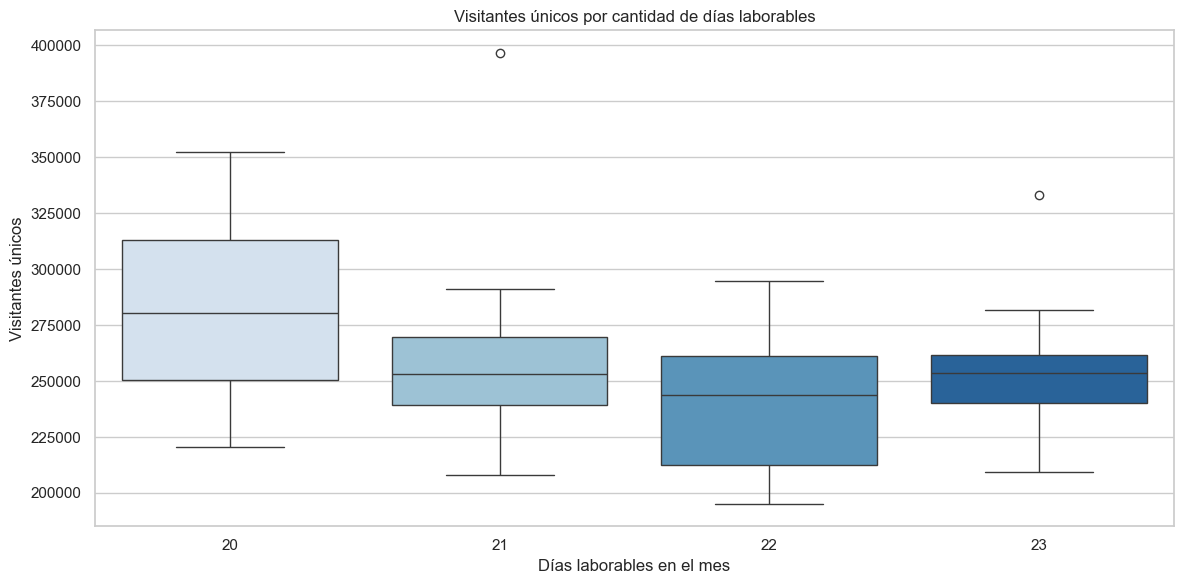

In [108]:
# Estilo
sns.set(style="whitegrid")

# Gráfico boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='working_days', y='Unique_visitors', palette='Blues')
plt.title('Visitantes únicos por cantidad de días laborables')
plt.xlabel('Días laborables en el mes')
plt.ylabel('Visitantes únicos')
plt.tight_layout()
plt.show()


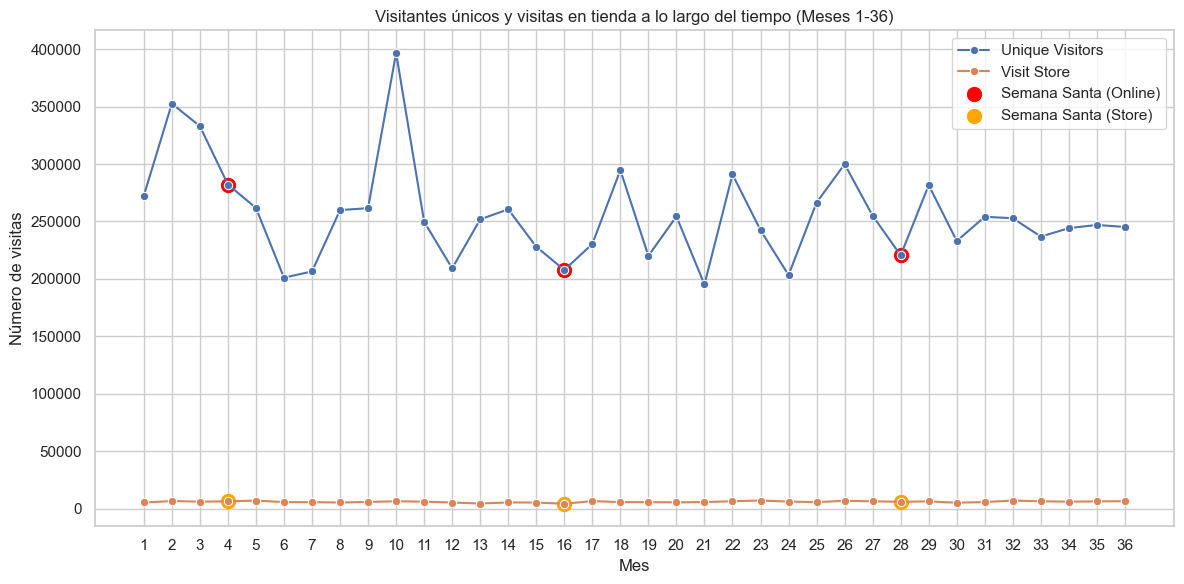

In [109]:
df['Mes_Num'] = range(1, len(df) + 1)

plt.figure(figsize=(12, 6))

# Desactivar errorbar
sns.lineplot(data=df, x='Mes_Num', y='Unique_visitors', marker='o', label='Unique Visitors', errorbar=None)
sns.lineplot(data=df, x='Mes_Num', y='Visit_Store', marker='o', label='Visit Store', errorbar=None)

# Colorear los puntos si es Semana Santa
easter_df = df[df['Easterweek'] == 1]
plt.scatter(easter_df['Mes_Num'], easter_df['Unique_visitors'], color='red', s=100, label='Semana Santa (Online)')
plt.scatter(easter_df['Mes_Num'], easter_df['Visit_Store'], color='orange', s=100, label='Semana Santa (Store)')

# Estética
plt.title('Visitantes únicos y visitas en tienda a lo largo del tiempo (Meses 1-36)')
plt.xlabel('Mes')
plt.ylabel('Número de visitas')
plt.legend()
plt.xticks(ticks=range(1, 37))
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
pip install numpy==2.2.4
print(np.__version__)


2.2.4


In [ ]:
import pandas as pd

# Cargar tus datos (ya debes tener el df cargado)
# Supongamos que se llama df

# Variables predictoras (X)
X_cols = [
    'CINE', 'EXTERIOR', 'INTERNET', 'PRENSA', 'PRODUCCION', 'RADIO',
    'REVISTAS', 'PlataformasVideo', 'VARIOS', 'INV_Total', 'OnlineMedia',
    'Dias_mes', 'working_days', 'Dias_fines_semana', 'Easterweek', 'Mes_Num'
]

X = df[X_cols]

In [34]:

# Variables objetivo (Y)
y_col_online = ['Unique_visitors']
y_col_sales = ['Sales']
y_sales = df[y_col_sales]
y_online = df[y_col_online]


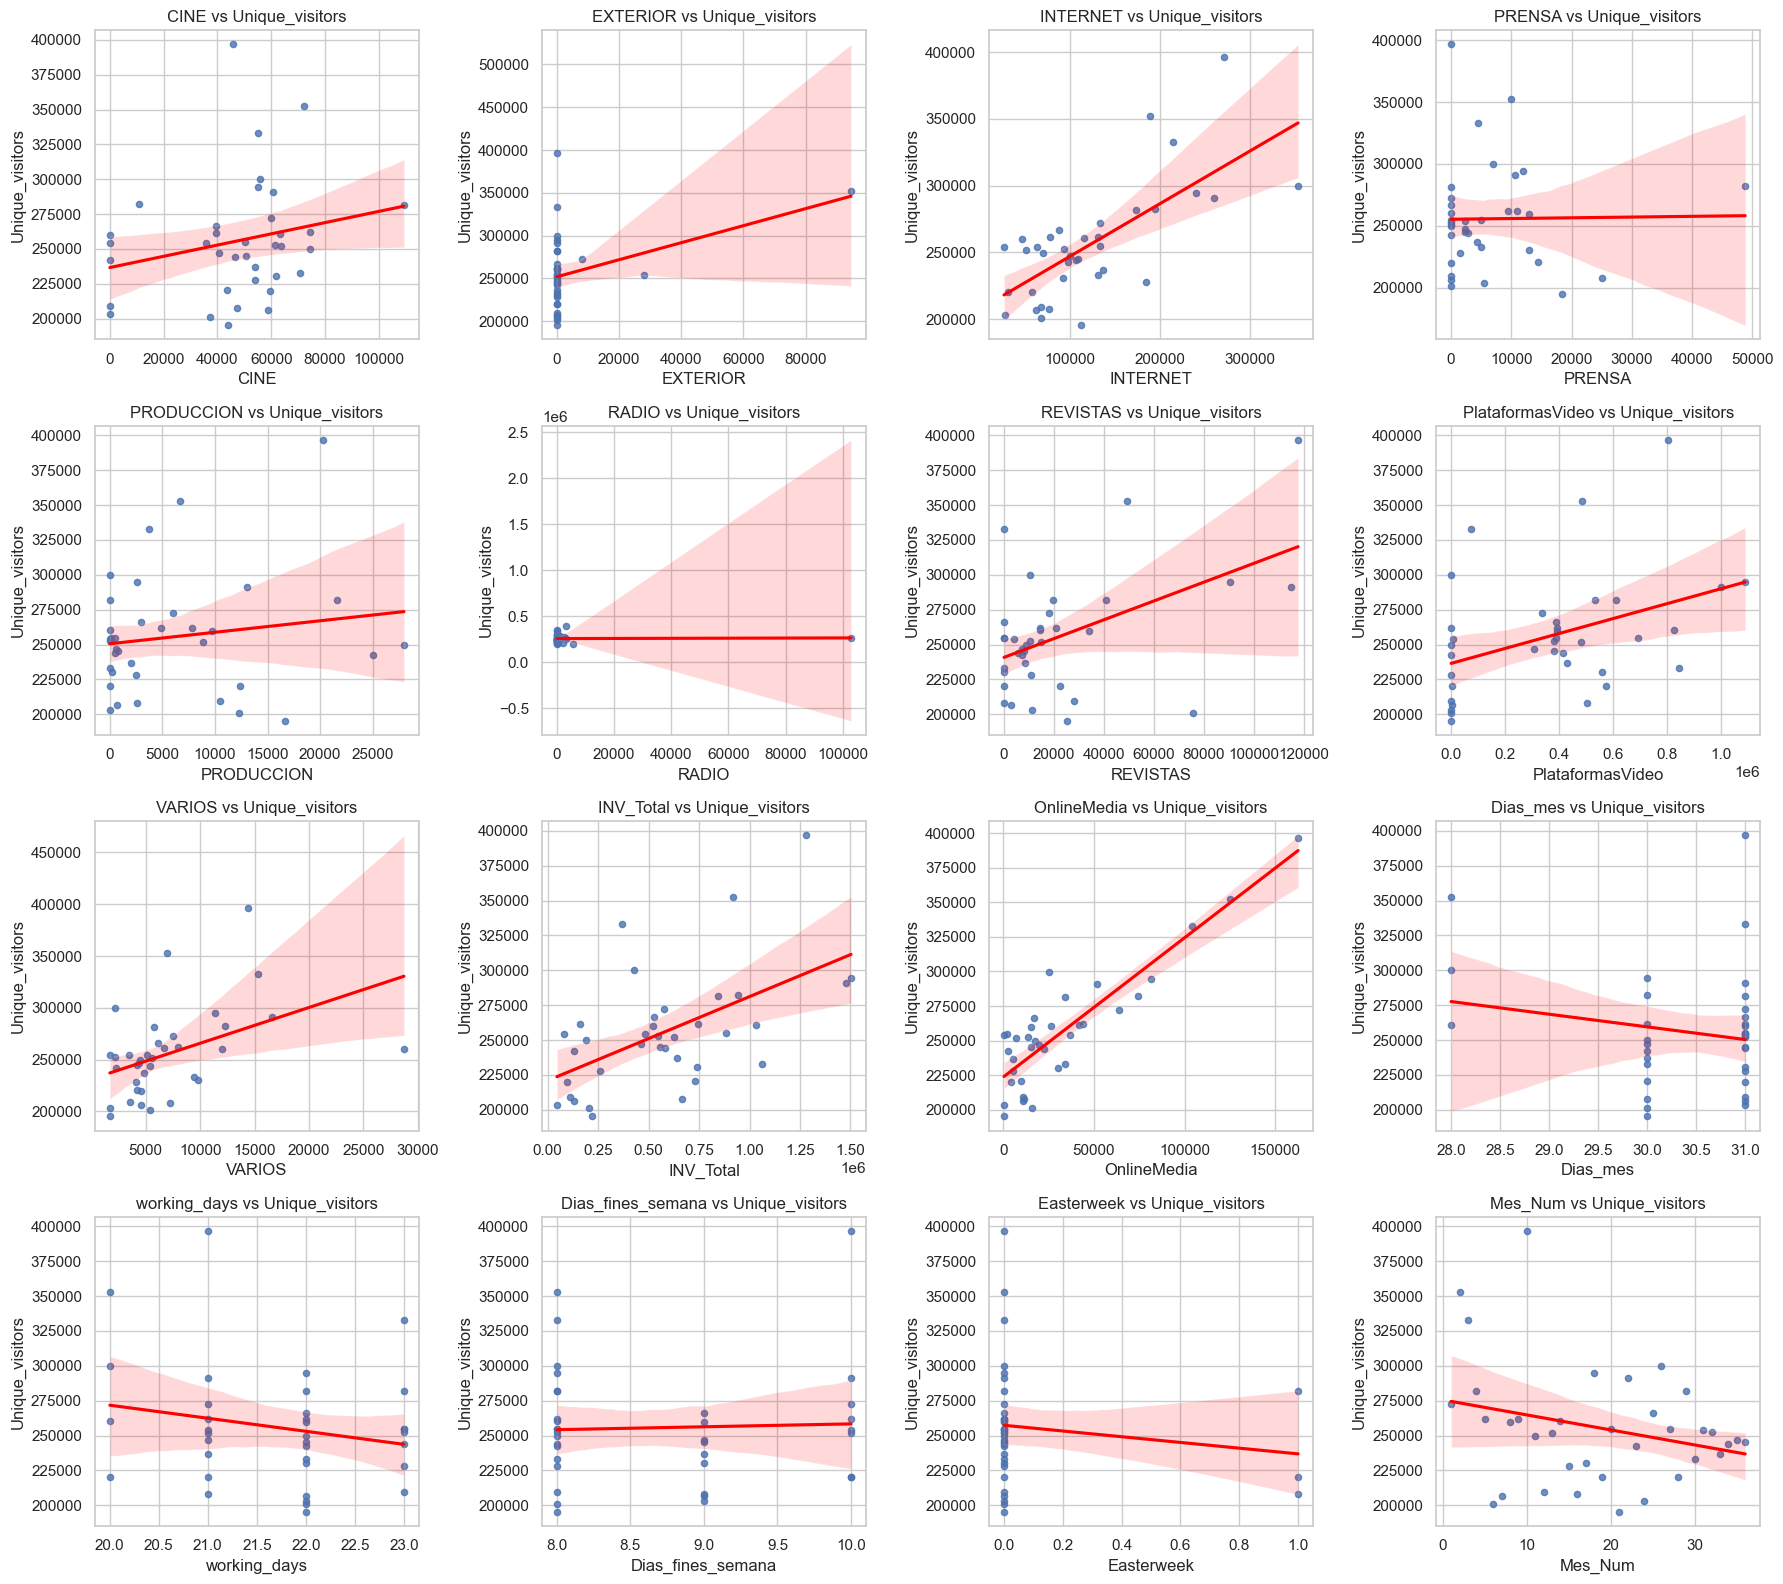

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = X.columns
n_cols = 4  # Número de columnas en la matriz
n_rows = (len(cols) + n_cols - 1) // n_cols  # Calcula cuántas filas se necesitan

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Graficar cada variable independiente contra la variable dependiente
for i, col in enumerate(cols):
    sns.regplot(data=df, x=col, y='Unique_visitors', ax=axes[i], scatter_kws={'s': 20}, line_kws={'color': 'red'})
    axes[i].set_title(f'{col} vs Unique_visitors')

# Eliminar subplots vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [101]:
x_cols_online = ["CINE", "INTERNET", "REVISTAS", "INV_Total", "OnlineMedia", "working_days", "Dias_fines_semana", "Easterweek", "Mes_Num", "EXTERIOR", "PRENSA", "PRODUCCION", "RADIO", "PlataformasVideo", "VARIOS"]
X_predict_online = df[x_cols_online]


In [102]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Escalar las variables
scaler = StandardScaler()
X_scaled_onl = scaler.fit_transform(X_predict_online)

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled_onl, y_online, test_size=0.2, random_state=42)

# Modelo
model = BayesianRidge()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.11413250092477889
MAE: 13165.178293694436


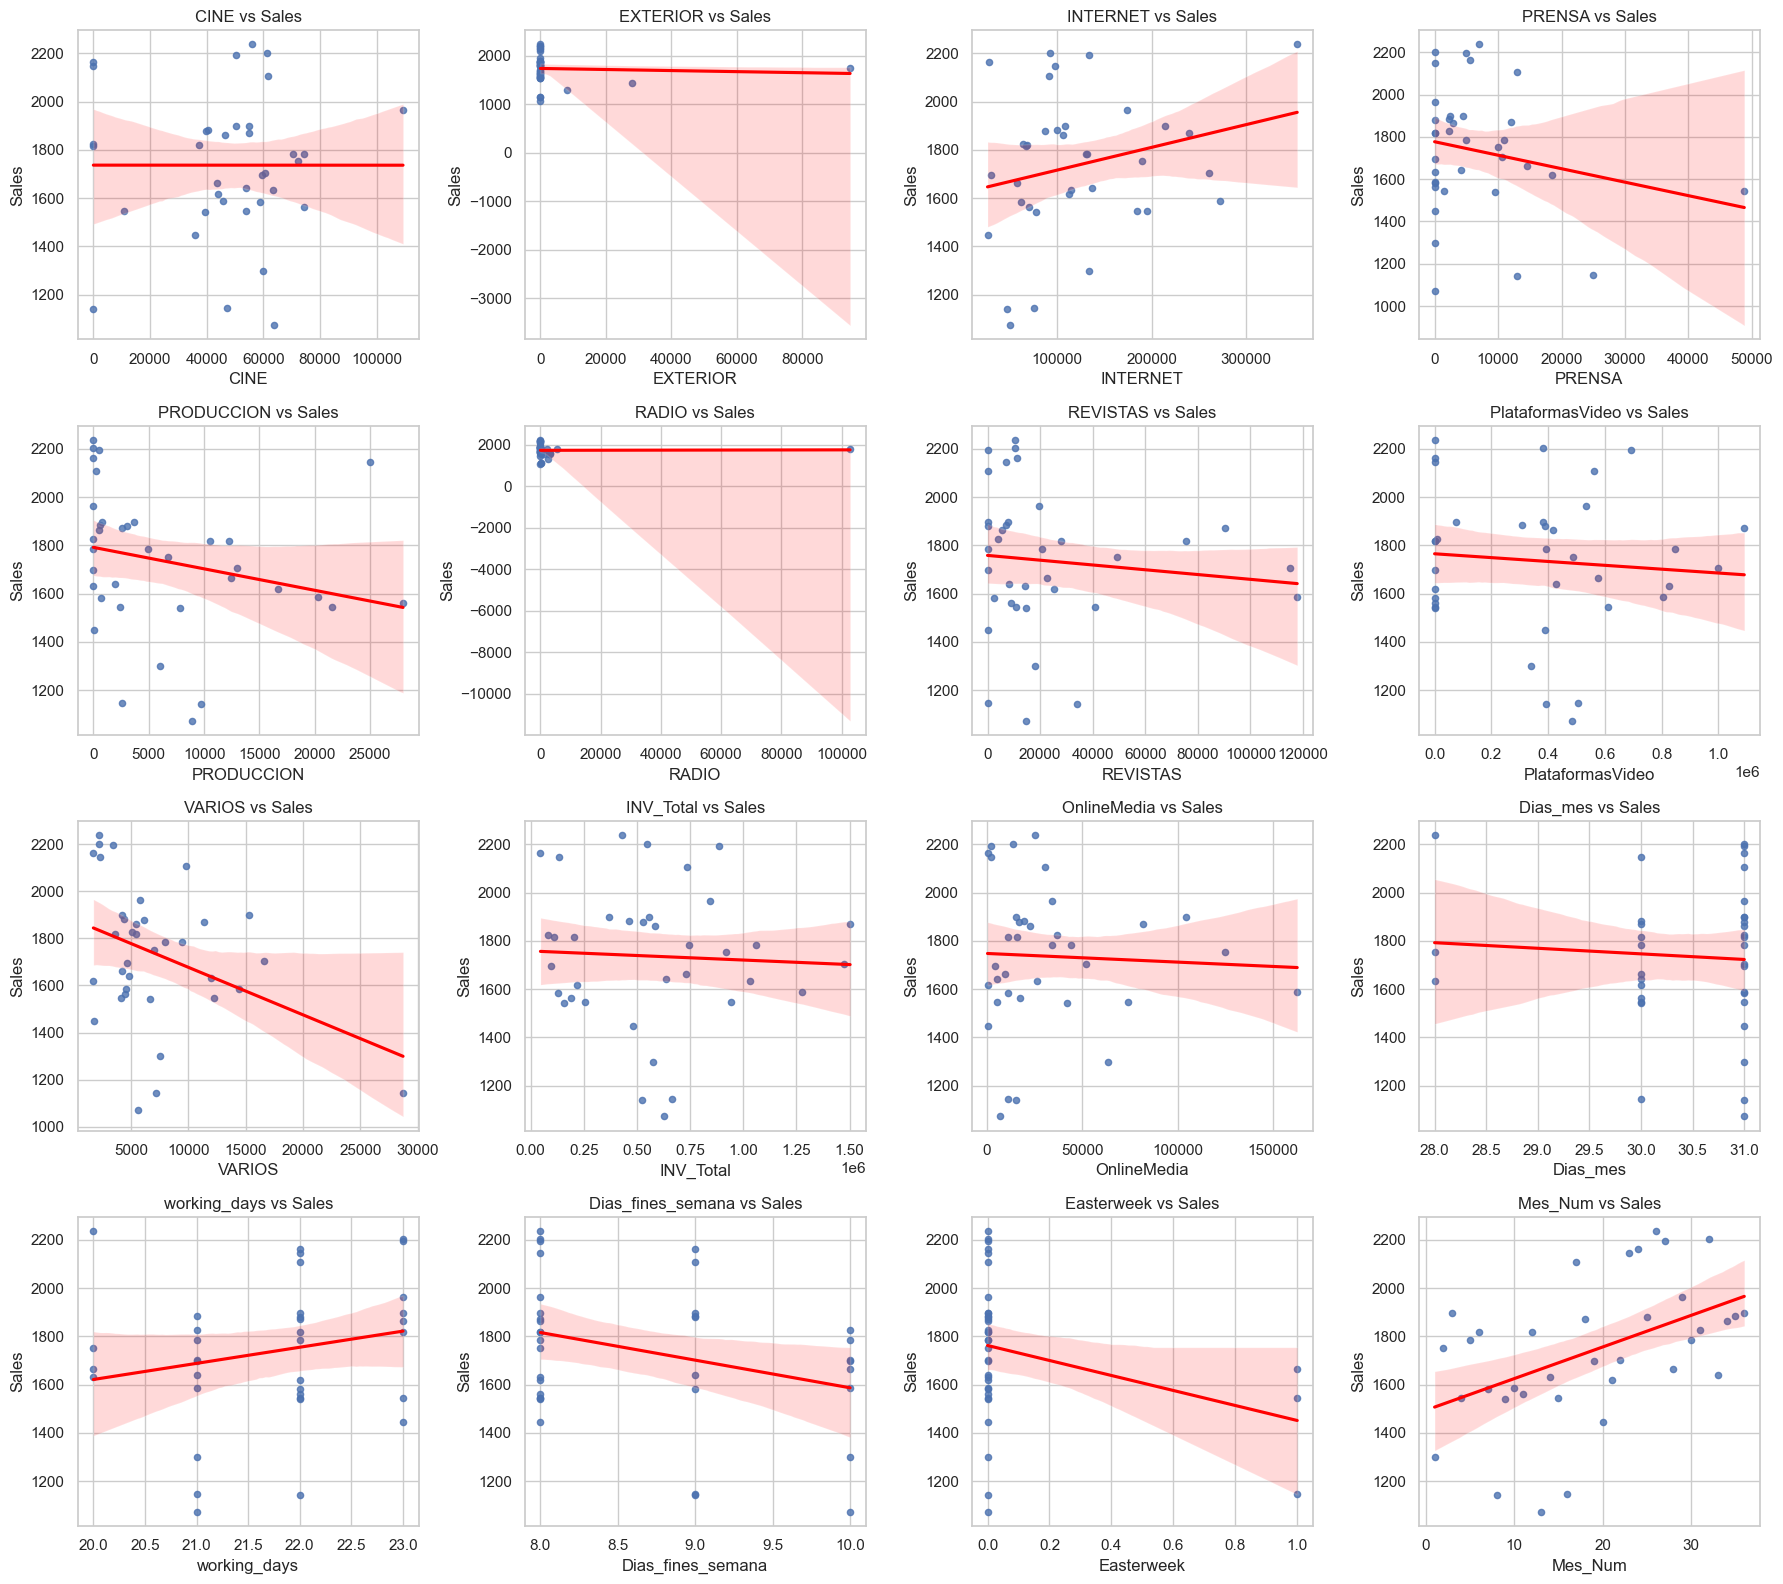

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = X.columns
n_cols = 4  # Número de columnas en la matriz
n_rows = (len(cols) + n_cols - 1) // n_cols  # Calcula cuántas filas se necesitan

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.regplot(data=df, x=col, y='Sales', ax=axes[i], scatter_kws={'s': 20}, line_kws={'color': 'red'})
    axes[i].set_title(f'{col} vs Sales')

# Eliminar subplots vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [16]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_sales, test_size=0.2, random_state=42)

# Modelo
model = BayesianRidge()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.1006440086503052
MAE: 270.89096559125875


c:\Users\josit\TERCER CURSO\IA\IA-Casos\env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
import pandas as pd

# Crear copia base
df_1 = filtered_df.drop(columns=['ID_Date']).copy()

# --------- FILTRO PARA UNIQUE_VISITORS ---------
# Calcular la matriz de correlación
corr_unique = df_1.corr(numeric_only=True)['Unique_visitors']

# Eliminar columnas que tienen una baja correlación (en este caso, podrías hacer más estricto el umbral)
# Filtro de correlación ajustado: eliminamos aquellos con correlación en un rango más estricto (-0.1 y 0.1)
cols_to_drop_unique = corr_unique[(corr_unique > -0.15) & (corr_unique < 0.15)].index.tolist()

# Eliminar columnas con alta correlación (mayor que 0.85) entre las variables predictoras
corr_matrix = df_1.corr(numeric_only=True)
high_corr_columns = set()

# Identificar columnas con alta correlación (mayor que 0.85) y agregarlas a la lista
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.65:
            colname = corr_matrix.columns[i]
            high_corr_columns.add(colname)

# Eliminar columnas con alta correlación
cols_to_drop_unique.extend(list(high_corr_columns))

# Filtrar las columnas para el modelo de Unique_visitors
df_unique = df_1.drop(columns=cols_to_drop_unique)

print(f"[Unique_visitors] Columnas eliminadas por baja correlación o alta multicolinealidad: {len(cols_to_drop_unique)}")
print("Columnas eliminadas:", cols_to_drop_unique)
df_unique.head()

[Unique_visitors] Columnas eliminadas por baja correlación o alta multicolinealidad: 13
Columnas eliminadas: ['Sales', 'PRENSA', 'RADIO', 'Dia_inicio_mes', 'Dia_findemes', 'Dias_fines_semana', 'Easterweek', 'INTERNET', 'Easterweek', 'OnlineMedia', 'Dias_fines_semana', 'Sales', 'INV_Total']


,Unique_visitors,Visit_Store,CINE,EXTERIOR,PRODUCCION,REVISTAS,PlataformasVideo,VARIOS,Dias_mes,working_days,Mes_Num
0,272382,5516,59887.84,8200.00,6050.0,18013.50,338824.94,7531.03,31,21,1
1,352581,6769,72291.56,94627.51,6700.0,49110.91,487537.14,6972.02,28,20,2
2,332955,6249,55000.00,0.00,3700.0,0.00,75000.00,15284.85,31,23,3
3,282169,6507,10883.30,0.00,21550.0,40876.00,610865.89,12255.75,30,22,4
4,261829,7183,74333.20,0.00,4900.0,20775.75,393807.74,7926.46,31,21,5


In [80]:

# --------- FILTRO PARA VISIT_STORE ---------
# Calcular la matriz de correlación para 'Visit_Store'
corr_store = df_1.corr(numeric_only=True)['Sales']

# Filtro de correlación ajustado: eliminamos aquellos con correlación en un rango más estricto (-0.1 y 0.1)
cols_to_drop_store = corr_store[(corr_store > -0.15) & (corr_store < 0.25)].index.tolist()

# Eliminar columnas con alta correlación (mayor que 0.85) entre las variables predictoras
high_corr_columns_store = set()

# Identificar columnas con alta correlación (mayor que 0.85) y agregarlas a la lista
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            high_corr_columns_store.add(colname)

# Eliminar columnas con alta correlación
cols_to_drop_store.extend(list(high_corr_columns_store))

# Filtrar las columnas para el modelo de Visit_Store
df_store = df_1.drop(columns=cols_to_drop_store)

print(f"\n[Visit_Store] Columnas eliminadas por baja correlación o alta multicolinealidad: {len(cols_to_drop_store)}")
print("Columnas eliminadas:", cols_to_drop_store)
df_store.head()



[Visit_Store] Columnas eliminadas por baja correlación o alta multicolinealidad: 13
Columnas eliminadas: ['Unique_visitors', 'CINE', 'EXTERIOR', 'INTERNET', 'RADIO', 'REVISTAS', 'PlataformasVideo', 'INV_Total', 'OnlineMedia', 'Dias_mes', 'Dia_findemes', 'working_days', 'INV_Total']


,Visit_Store,Sales,PRENSA,PRODUCCION,VARIOS,Dia_inicio_mes,Dias_fines_semana,Easterweek,Mes_Num
0,5516,1299,0.0,6050.0,7531.03,5,10,0,1
1,6769,1752,10000.0,6700.0,6972.02,1,8,0,2
2,6249,1897,4500.0,3700.0,15284.85,1,8,0,3
3,6507,1546,48800.0,21550.0,12255.75,4,8,1,4
4,7183,1784,11000.0,4900.0,7926.46,6,10,0,5


In [ ]:
import numpy as np
from sklearn.metrics import r2_score

# --- Validaciones básicas ---
print(f"✔️ Tamaño y_test: {len(y_test_online)}")
print(f"✔️ Tamaño y_pred: {len(y_pred_online)}")

assert len(y_test_online) == len(y_pred_online), "❌ ¡Tamaños diferentes entre y_test y y_pred!"
assert not np.isnan(y_pred_online).any(), "❌ ¡Hay valores NaN en y_pred!"
assert not np.isinf(y_pred_online).any(), "❌ ¡Hay valores infinitos en y_pred!"
assert not np.isnan(y_test_online).any(), "❌ ¡Hay valores NaN en y_test!"
assert not np.isinf(y_test_online).any(), "❌ ¡Hay valores infinitos en y_test!"

# --- Cálculo manual de R² ---
ss_res = np.sum((y_test_online - y_pred_online) ** 2)
ss_tot = np.sum((y_test_online - np.mean(y_test_online)) ** 2)
r2_manual = 1 - (ss_res / ss_tot)

print(f"📐 R² (sklearn): {r2_score(y_test_online, y_pred_online):.4f}")
print(f"🧮 R² (manual): {r2_manual:.4f}")


NameError: name 'y_test_online' is not defined

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selección de variables predictoras según la matriz de correlación
predictors_online = df_unique.drop(columns=['Unique_visitors', 'Visit_Store']).columns.tolist()
predictors_offline = df_store.drop(columns=[ 'Visit_Store', "Sales"]).columns.tolist()

# Variables objetivo
y_online = filtered_df['Unique_visitors']
y_offline = filtered_df['Sales']


# Preparar conjuntos X para cada modelo
X_online = filtered_df[predictors_online]
X_offline = filtered_df[predictors_offline]

# Estandarización de las variables predictoras
scaler_online = StandardScaler()
scaler_offline = StandardScaler()

X_online_scaled = scaler_online.fit_transform(X_online)
X_offline_scaled = scaler_offline.fit_transform(X_offline)

# Dividir en entrenamiento y prueba
X_train_online, X_test_online, y_train_online, y_test_online = train_test_split(X_online_scaled, y_online, test_size=0.2, random_state=42)
X_train_offline, X_test_offline, y_train_offline, y_test_offline = train_test_split(X_offline_scaled, y_offline, test_size=0.2, random_state=42)

# Modelos de regresión lineal
model_online = LinearRegression().fit(X_train_online, y_train_online)
model_offline = LinearRegression().fit(X_train_offline, y_train_offline)

# Predicciones
y_pred_online = model_online.predict(X_test_online)
y_pred_offline = model_offline.predict(X_test_offline)

# Métricas
mse_online = mean_squared_error(y_test_online, y_pred_online)
r2_online = r2_score(y_test_online, y_pred_online)

mse_offline = mean_squared_error(y_test_offline, y_pred_offline)
r2_offline = r2_score(y_test_offline, y_pred_offline)

print(f"📊 Online - MSE: {mse_online:.2f}, R²: {r2_online:.2f}")
print(f"🏬 Offline - MSE: {mse_offline:.2f}, R²: {r2_offline:.2f}")

# Coeficientes
coef_online_df = pd.DataFrame({'Canal': predictors_online, 'Impacto en Visitas Online': model_online.coef_})
coef_offline_df = pd.DataFrame({'Canal': predictors_offline, 'Impacto en Visitas Offline': model_offline.coef_})

print("\nCoeficientes Online:")
print(coef_online_df)

print("\nCoeficientes Offline:")
print(coef_offline_df)


📊 Online - MSE: 814413521.57, R²: -2.19
🏬 Offline - MSE: 89682.95, R²: 0.27

Coeficientes Online:
              Canal  Impacto en Visitas Online
0              CINE               12818.687019
1          EXTERIOR               13149.384055
2        PRODUCCION                4261.815394
3          REVISTAS               14254.648569
4  PlataformasVideo                1486.038128
5            VARIOS               18217.095042
6          Dias_mes               -2033.712078
7      working_days                -463.993143
8           Mes_Num                2704.045706

Coeficientes Offline:
               Canal  Impacto en Visitas Offline
0             PRENSA                   59.342225
1         PRODUCCION                   13.976726
2             VARIOS                  -61.714137
3     Dia_inicio_mes                  -70.952450
4  Dias_fines_semana                   21.596634
5         Easterweek                 -107.688970
6            Mes_Num                  106.640349


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
import pandas as pd

# Selección de variables predictoras según la matriz de correlación
# predictors_online = ['INTERNET', 'REVISTAS', 'VARIOS', 'PlataformasVideo', 'INV_Total']
predictors_online = df_unique.drop(columns=['Unique_visitors', 'Visit_Store']).columns.tolist()
predictors_offline = df_unique.drop(columns=['Unique_visitors', 'Visit_Store']).columns.tolist()

# Variables objetivo
y_online = filtered_df['Unique_visitors']
y_offline = filtered_df['Visit_Store']

# Preparar conjuntos X para cada modelo
X_online = filtered_df[predictors_online]
X_offline = filtered_df[predictors_offline]

# Dividir en entrenamiento y prueba
X_train_online, X_test_online, y_train_online, y_test_online = train_test_split(X_online, y_online, test_size=0.2, random_state=42)
X_train_offline, X_test_offline, y_train_offline, y_test_offline = train_test_split(X_offline, y_offline, test_size=0.2, random_state=42)

# Modelos de regresión Ridge (ajustando alpha según sea necesario)
model_online = Ridge(alpha=1.0).fit(X_train_online, y_train_online)  # alpha es el parámetro de regularización
model_offline = Ridge(alpha=1.0).fit(X_train_offline, y_train_offline)

# Predicciones
y_pred_online = model_online.predict(X_test_online)
y_pred_offline = model_offline.predict(X_test_offline)

# Métricas de evaluación
mse_online = mean_squared_error(y_test_online, y_pred_online)
r2_online = r2_score(y_test_online, y_pred_online)

mse_offline = mean_squared_error(y_test_offline, y_pred_offline)
r2_offline = r2_score(y_test_offline, y_pred_offline)

print(f"📊 **Online** - MSE: {mse_online:.2f}, R²: {r2_online:.2f}")
print(f"🏬 **Offline** - MSE: {mse_offline:.2f}, R²: {r2_offline:.2f}")

# Coeficientes
coef_online_df = pd.DataFrame({'Canal': predictors_online, 'Impacto en Visitas Online': model_online.coef_})
coef_offline_df = pd.DataFrame({'Canal': predictors_offline, 'Impacto en Visitas Offline': model_offline.coef_})

print("\n**Coeficientes para visitas Online:**")
print(coef_online_df)

print("\n**Coeficientes para visitas Offline (tienda):**")
print(coef_offline_df)


📊 **Online** - MSE: 437267163.16, R²: -0.72
🏬 **Offline** - MSE: 625127.71, R²: -0.05

**Coeficientes para visitas Online:**
              Canal  Impacto en Visitas Online
0          EXTERIOR                   0.908258
1          REVISTAS                   0.446581
2  PlataformasVideo                   0.021921
3            VARIOS                   2.572654

**Coeficientes para visitas Offline (tienda):**
              Canal  Impacto en Visitas Offline
0          EXTERIOR                    0.004386
1          REVISTAS                    0.005154
2  PlataformasVideo                   -0.000218
3            VARIOS                   -0.018640


In [ ]:
print("Impacto en Visitas Offline:")
coef_offline_df

Impacto en Visitas Offline:


,Canal,Impacto en Visitas Offline
0,EXTERIOR,0.004386
1,REVISTAS,0.005154
2,PlataformasVideo,-0.000218
3,VARIOS,-0.018640


In [ ]:
print("Impacto en Visitas Online:")
coef_online_df

Impacto en Visitas Online:


,Canal,Impacto en Visitas Online
0,EXTERIOR,0.908258
1,REVISTAS,0.446581
2,PlataformasVideo,0.021921
3,VARIOS,2.572654


In [ ]:
import matplotlib.pyplot as plt

resultados.plot.barh(x='Canal', y='Impacto_en_Ventas', 
                    title='Impacto de cada canal en ventas (Regresión Lineal)')
plt.xlabel('Incremento en visitas por € invertido')
plt.show()

NameError: name 'resultados' is not defined